## 1. Importing  Necessary Libraries

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# import all libraries and dependencies for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import plotly.express as px
# import plotly.graph_objs as go
# import plotly.figure_factory as ff

# from plotly.subplots import make_subplots

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_colwidth', None) 

# default figure size
plt.rcParams["figure.figsize"] = (15, 10)


from scipy.stats import shapiro

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split

## 2. Reading & Understanding the Data

In [2]:
url  = "https://raw.githubusercontent.com/Latentview/Hackathon/main/e-commerce Raw Data V1.csv"
url = url.replace(" ", "%20") # Replacing space in url with %20 as it corresponds to whitespace in URL-encoding

df = pd.read_csv(url)
df.head().T

,0,1,2,3,4
RETAIL_YEAR,2022,2022,2022,2022,2022
RETAIL_WEEK,18,18,18,18,18
CAL_YR,2022,2022,2022,2022,2022
CAL_WK,18,18,18,18,18
BYR_CNTRY_DESC,United States,United States,United States,United States,United States
ITEM_ID,897015,377971,214514,164151,435930
TRANSACTION_ID,559742871,19861469,444472702,160368271,278552060
AUCT_END_DT,14-07-2022,06-07-2022,23-07-2022,28-07-2022,28-07-2022
SLR_CNTRY_ID,1,1,1,1,1
BYR_CNTRY_ID,1,1,1,1,1


In [3]:
df.columns

Index(['RETAIL_YEAR', 'RETAIL_WEEK', 'CAL_YR', 'CAL_WK', 'BYR_CNTRY_DESC',
       'ITEM_ID', 'TRANSACTION_ID', 'AUCT_END_DT', 'SLR_CNTRY_ID',
       'BYR_CNTRY_ID', 'BUYER_ID', 'LEAF_CATEG_ID', 'CREATED_DT',
       'BSNS_VRTCL_NAME', 'META_CATEG_NAME', 'USER_CRE_DATE',
       'CATEG_LVL2_NAME', 'CATEG_LVL3_NAME', 'CATEG_LVL4_NAME', 'PL_FLAG',
       'CHECKOUT_STATUS', 'PAYMENT_METHOD', 'BIN_YN_ID', 'SALE_TYPE',
       'START_PRICE_USD', 'CURNT_PRICE_USD', 'QUANTITY', 'GMB', 'FM_seg'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RETAIL_YEAR      10000 non-null  int64  
 1   RETAIL_WEEK      10000 non-null  int64  
 2   CAL_YR           10000 non-null  int64  
 3   CAL_WK           10000 non-null  int64  
 4   BYR_CNTRY_DESC   10000 non-null  object 
 5   ITEM_ID          10000 non-null  int64  
 6   TRANSACTION_ID   10000 non-null  int64  
 7   AUCT_END_DT      10000 non-null  object 
 8   SLR_CNTRY_ID     10000 non-null  int64  
 9   BYR_CNTRY_ID     10000 non-null  int64  
 10  BUYER_ID         10000 non-null  int64  
 11  LEAF_CATEG_ID    10000 non-null  int64  
 12  CREATED_DT       10000 non-null  object 
 13  BSNS_VRTCL_NAME  10000 non-null  object 
 14  META_CATEG_NAME  10000 non-null  object 
 15  USER_CRE_DATE    10000 non-null  object 
 16  CATEG_LVL2_NAME  10000 non-null  object 
 17  CATEG_LVL3_NA

### 2.1 Checking for null values

In [5]:
# Checking for missing values in the dataset
df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

RETAIL_YEAR        0.0
USER_CRE_DATE      0.0
GMB                0.0
QUANTITY           0.0
CURNT_PRICE_USD    0.0
dtype: float64

In [6]:
df.describe() # getting the summary statistics of the dataset

,RETAIL_YEAR,RETAIL_WEEK,CAL_YR,CAL_WK,ITEM_ID,TRANSACTION_ID,SLR_CNTRY_ID,BYR_CNTRY_ID,BUYER_ID,LEAF_CATEG_ID,PL_FLAG,CHECKOUT_STATUS,PAYMENT_METHOD,BIN_YN_ID,SALE_TYPE,START_PRICE_USD,CURNT_PRICE_USD,QUANTITY,GMB
count,10000.0,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2022.0,19.737000,2022.0,19.551500,513116.540200,5.017883e+08,10.990900,4.093400,2.733794e+08,113380.536100,0.451200,2.016500,33.776300,0.865700,7.805600,50.337242,59.491510,1.149300,60.402843
std,0.0,1.316968,0.0,1.337508,282693.927003,2.845823e+08,29.632125,19.346739,4.696493e+08,93367.435872,0.497638,0.153069,2.745471,0.340991,2.790804,215.218564,704.684025,1.324607,702.174854
min,2022.0,18.000000,2022.0,17.000000,20002.000000,1.017533e+07,1.000000,1.000000,1.902900e+04,28.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000,1.000000,0.010000
25%,2022.0,19.000000,2022.0,18.000000,269025.250000,2.547082e+08,1.000000,1.000000,3.184499e+07,33164.000000,0.000000,2.000000,34.000000,1.000000,9.000000,7.197500,7.990000,1.000000,8.615000
50%,2022.0,20.000000,2022.0,20.000000,519111.000000,5.024180e+08,1.000000,1.000000,1.042111e+08,71278.000000,0.000000,2.000000,34.000000,1.000000,9.000000,15.990000,17.285000,1.000000,17.990000
75%,2022.0,21.000000,2022.0,21.000000,756195.250000,7.474370e+08,1.000000,1.000000,2.879145e+08,181308.500000,1.000000,2.000000,34.000000,1.000000,9.000000,36.990000,39.990000,1.000000,40.592500
max,2022.0,22.000000,2022.0,22.000000,999746.000000,9.998751e+08,229.000000,225.000000,2.416285e+09,263012.000000,1.000000,3.000000,34.000000,1.000000,9.000000,11195.000000,66600.000000,70.000000,66600.000000


### 2.2 Checking for duplicate rows

In [7]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(0, 29)

In [8]:
df['PAYMENT_METHOD'].value_counts()

34    9934
0       65
7        1
Name: PAYMENT_METHOD, dtype: int64

## 3. Cleaning the Data

### 3.1 Dropping unnecessary column

In [9]:
df = df.drop(['PAYMENT_METHOD','TRANSACTION_ID','BIN_YN_ID','PL_FLAG','LEAF_CATEG_ID','ITEM_ID', 'BUYER_ID','BYR_CNTRY_ID'], axis=1)

In [10]:
df = pd.DataFrame(df)

In [11]:
df['SALE_TYPE'].value_counts()

9    8294
1    1422
7     284
Name: SALE_TYPE, dtype: int64

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df = df.drop('SALE_TYPE', axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RETAIL_YEAR      10000 non-null  int64  
 1   RETAIL_WEEK      10000 non-null  int64  
 2   CAL_YR           10000 non-null  int64  
 3   CAL_WK           10000 non-null  int64  
 4   BYR_CNTRY_DESC   10000 non-null  object 
 5   AUCT_END_DT      10000 non-null  object 
 6   SLR_CNTRY_ID     10000 non-null  int64  
 7   CREATED_DT       10000 non-null  object 
 8   BSNS_VRTCL_NAME  10000 non-null  object 
 9   META_CATEG_NAME  10000 non-null  object 
 10  USER_CRE_DATE    10000 non-null  object 
 11  CATEG_LVL2_NAME  10000 non-null  object 
 12  CATEG_LVL3_NAME  10000 non-null  object 
 13  CATEG_LVL4_NAME  10000 non-null  object 
 14  CHECKOUT_STATUS  10000 non-null  int64  
 15  START_PRICE_USD  10000 non-null  float64
 16  CURNT_PRICE_USD  10000 non-null  float64
 17  QUANTITY     

In [15]:
l = df['RETAIL_YEAR']==df['CAL_YR']

In [16]:
l.unique()

array([ True])

We can see that **CAL_YR** and **RETAIL_YEAR** are exactly same

In [17]:
df= df.drop('CAL_YR', axis=1)

In [18]:
l2 = df['RETAIL_WEEK']==df['CAL_WK']

In [19]:
l2.unique()

array([ True, False])

We can see that **CAL_YR** and **RETAIL_YEAR** are exactly same

In [20]:
l3  = df['CATEG_LVL3_NAME'] == df['CATEG_LVL4_NAME']

In [21]:
l3.unique()

array([ True, False])

In [22]:
df.CHECKOUT_STATUS.value_counts()

2    9787
3     193
1      12
0       8
Name: CHECKOUT_STATUS, dtype: int64

Separating numeircal and categorical column name

In [23]:
num_col = df.select_dtypes(exclude='object').columns
num_col

Index(['RETAIL_YEAR', 'RETAIL_WEEK', 'CAL_WK', 'SLR_CNTRY_ID',
       'CHECKOUT_STATUS', 'START_PRICE_USD', 'CURNT_PRICE_USD', 'QUANTITY',
       'GMB'],
      dtype='object')

In [24]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['BYR_CNTRY_DESC', 'AUCT_END_DT', 'CREATED_DT', 'BSNS_VRTCL_NAME',
       'META_CATEG_NAME', 'USER_CRE_DATE', 'CATEG_LVL2_NAME',
       'CATEG_LVL3_NAME', 'CATEG_LVL4_NAME', 'FM_seg'],
      dtype='object')

In [25]:
df.shape

(10000, 19)

## 4. Exploratory Data Analysis

### 4.1 Distribution Checking

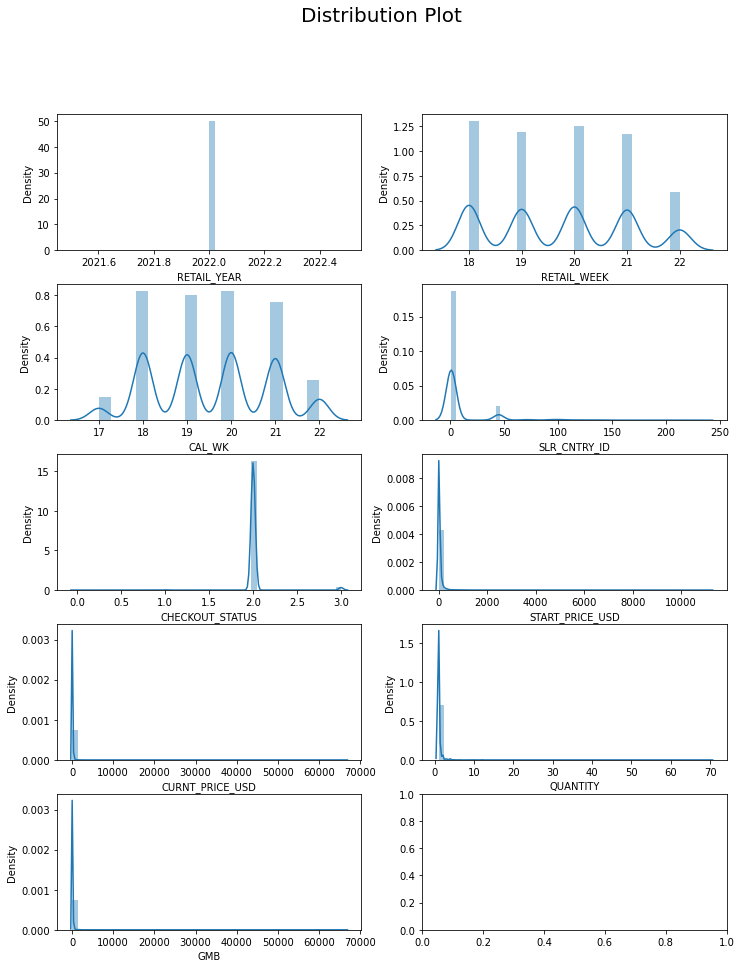

In [26]:
# Plotting distribution curve
rows = 5
cols = 2
fig, axes = plt.subplots(nrows=rows,ncols=cols, figsize=(12,15))

for name, ax in zip(num_col, axes.flatten()):
    sns.distplot(df[name], ax=ax)

fig.suptitle("Distribution Plot", fontsize=20)
fig.subplots_adjust(hspace=0.25)
# fig.delaxes(axes[3,1])

None of the numerical column seems to be normally distributed. 

**In Shapiro-Wilk Normality Test :**

H0 : The data are normally distributed

In [27]:
for i in range(len(num_col)):
    stat,p = shapiro(df[num_col[i]])
    print(num_col[i])
    print('P_value =  ' , (p))
    print("*******************************")

RETAIL_YEAR
P_value =   1.0
*******************************
RETAIL_WEEK
P_value =   0.0
*******************************
CAL_WK
P_value =   0.0
*******************************
SLR_CNTRY_ID
P_value =   0.0
*******************************
CHECKOUT_STATUS
P_value =   0.0
*******************************
START_PRICE_USD
P_value =   0.0
*******************************
CURNT_PRICE_USD
P_value =   0.0
*******************************
QUANTITY
P_value =   0.0
*******************************
GMB
P_value =   0.0
*******************************


According to the P_value obtained from the Shapiro test (p_value < 5%), 
we reject our null hypothesis 

(H0) --> So the numerical fields do not follow the normal distribution. 

Thus, our numerical column are not **normally distributed**

### 4.2 Outlier Detection

In [28]:
def outlier_detect(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))]

# -------------------------------------------
def lower_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col] < (q1_col - 1.5 * iqr_col))]
    return lower

# -------------------------------------------
def upper_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = df[(df[col] > (q3_col + 1.5 * iqr_col))]
    return upper

# -------------------------------------------
def replace_upper(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 9999999
    upper = q3_col + 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x < (upper)), tmp)
    df[col] = df[col].replace(tmp, upper)
    print('outlire replace with upper bound - {}' .format(col)) 
    
# -------------------------------------------
def replace_lower(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 1111111
    lower = q1_col - 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x > (lower)), tmp)
    df[col] = df[col].replace(tmp, lower)
    print('outlire replace with lower bound - {}' .format(col)) 


In [29]:
def find_outliers(df, col):
    
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    
    IQR = q3 - q1

    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)

    ls = df.index[(df[col]<lower_bound) | (df[col]>upper_bound)]
    

    if len(ls) > 0:
        print("There are ",len(ls), "Outliers present in column : ", col)
    return(ls)

In [30]:
outliers = []
for col in num_col:
    outliers.extend(find_outliers(df, col))
print("Total number of outliers is ",len(set(outliers)))

There are  1538 Outliers present in column :  SLR_CNTRY_ID
There are  213 Outliers present in column :  CHECKOUT_STATUS
There are  1174 Outliers present in column :  START_PRICE_USD
There are  1179 Outliers present in column :  CURNT_PRICE_USD
There are  631 Outliers present in column :  QUANTITY
There are  1220 Outliers present in column :  GMB
Total number of outliers is  3239


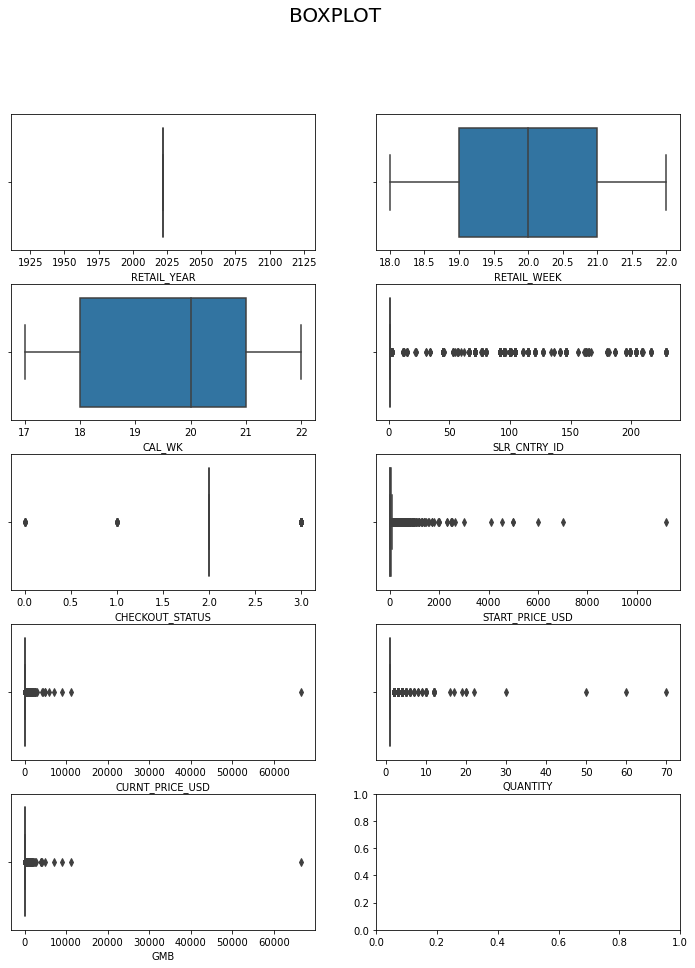

In [31]:
# Plotting boxplot
rows = 5
cols = 2
fig, axes = plt.subplots(nrows=rows,ncols=cols, figsize=(12,15))
# plt.figure(figsize=(10,10))
for name, ax in zip(num_col, axes.flatten()):
    sns.boxplot(df[name], ax=ax)
fig.suptitle("BOXPLOT", fontsize=20)
fig.subplots_adjust(hspace=0.25)
# fig.delaxes(axes[3,1])

### 4.2 Handling outliers 

In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [33]:
for i in range(0,len(num_col)):
    print("IQR => {}: {}".format(num_col[i],(outlier_detect(df[num_col],num_col[i]).shape[0])))

IQR => RETAIL_YEAR: 0
IQR => RETAIL_WEEK: 0
IQR => CAL_WK: 0
IQR => SLR_CNTRY_ID: 1538
IQR => CHECKOUT_STATUS: 213
IQR => START_PRICE_USD: 1174
IQR => CURNT_PRICE_USD: 1179
IQR => QUANTITY: 631
IQR => GMB: 1220


In [34]:
outlier = []
for i in range(len(num_col)):
    if outlier_detect(df[num_col],num_col[i]).shape[0] !=0:
        outlier.append(num_col[i])
outlier

['SLR_CNTRY_ID',
 'CHECKOUT_STATUS',
 'START_PRICE_USD',
 'CURNT_PRICE_USD',
 'QUANTITY',
 'GMB']

#### 4.2.1 by replacing outliers with upper and lower bound

In [35]:
for i in range(len(outlier)):
    replace_upper(df, outlier[i]) 
    
print("\n*******************************************\n")
for i in range(len(outlier)):
    replace_lower(df, outlier[i])

outlire replace with upper bound - SLR_CNTRY_ID
outlire replace with upper bound - CHECKOUT_STATUS
outlire replace with upper bound - START_PRICE_USD
outlire replace with upper bound - CURNT_PRICE_USD
outlire replace with upper bound - QUANTITY
outlire replace with upper bound - GMB

*******************************************

outlire replace with lower bound - SLR_CNTRY_ID
outlire replace with lower bound - CHECKOUT_STATUS
outlire replace with lower bound - START_PRICE_USD
outlire replace with lower bound - CURNT_PRICE_USD
outlire replace with lower bound - QUANTITY
outlire replace with lower bound - GMB


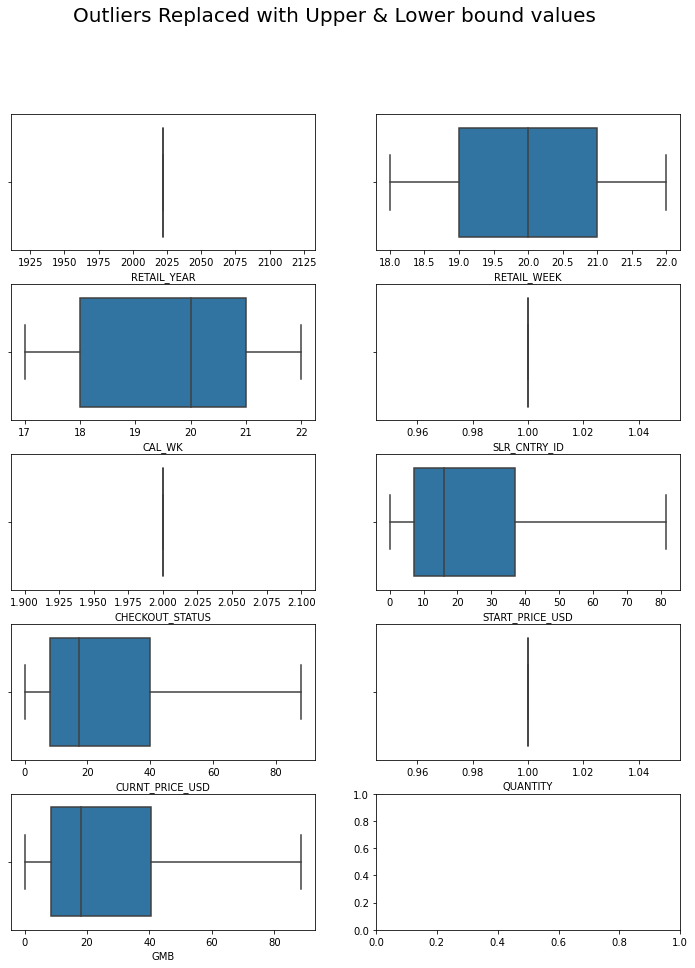

In [36]:
# Plotting boxplot
rows = 5
cols = 2
fig, axes = plt.subplots(nrows=rows,ncols=cols, figsize=(12,15))
# plt.figure(figsize=(10,10))
for name, ax in zip(num_col, axes.flatten()):
    sns.boxplot(df[name], ax=ax)
fig.suptitle("Outliers Replaced with Upper & Lower bound values", fontsize=20)
fig.subplots_adjust(hspace=0.25)

### 4.3 Checking correlation of data 

In [37]:
df_corr = df.corr()
df_corr

,RETAIL_YEAR,RETAIL_WEEK,CAL_WK,SLR_CNTRY_ID,CHECKOUT_STATUS,START_PRICE_USD,CURNT_PRICE_USD,QUANTITY,GMB
RETAIL_YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RETAIL_WEEK,NaN,1.000000,0.957228,NaN,NaN,-0.005439,-0.003421,NaN,-0.003723
CAL_WK,NaN,0.957228,1.000000,NaN,NaN,0.003286,0.000091,NaN,-0.000518
SLR_CNTRY_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHECKOUT_STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
START_PRICE_USD,NaN,-0.005439,0.003286,NaN,NaN,1.000000,0.934015,NaN,0.902471
CURNT_PRICE_USD,NaN,-0.003421,0.000091,NaN,NaN,0.934015,1.000000,NaN,0.943214
QUANTITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GMB,NaN,-0.003723,-0.000518,NaN,NaN,0.902471,0.943214,NaN,1.000000


<AxesSubplot:>

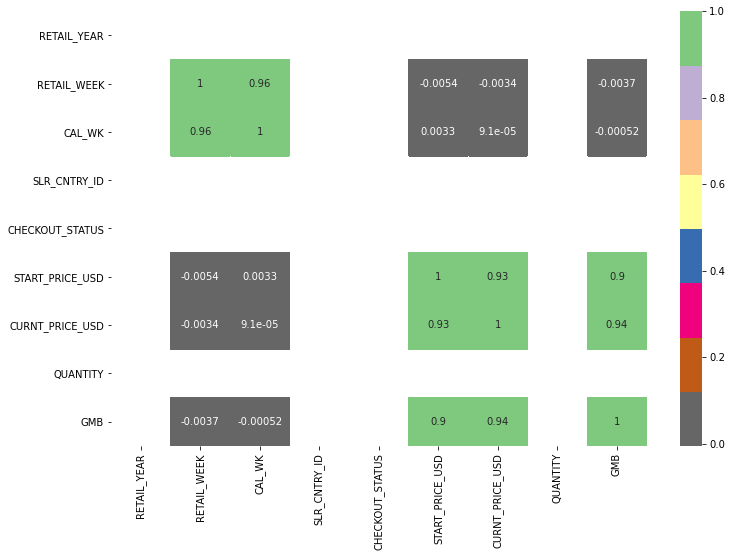

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, cmap="Accent_r", annot=True)

The columns **SLR_CNTRY_ID, BYR_CNTRY_I** do not have any correlation among them. Also,  **RETAIL_YEAR** is not correlated to any other column

In [39]:
cat_col

Index(['BYR_CNTRY_DESC', 'AUCT_END_DT', 'CREATED_DT', 'BSNS_VRTCL_NAME',
       'META_CATEG_NAME', 'USER_CRE_DATE', 'CATEG_LVL2_NAME',
       'CATEG_LVL3_NAME', 'CATEG_LVL4_NAME', 'FM_seg'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='META_CATEG_NAME'>

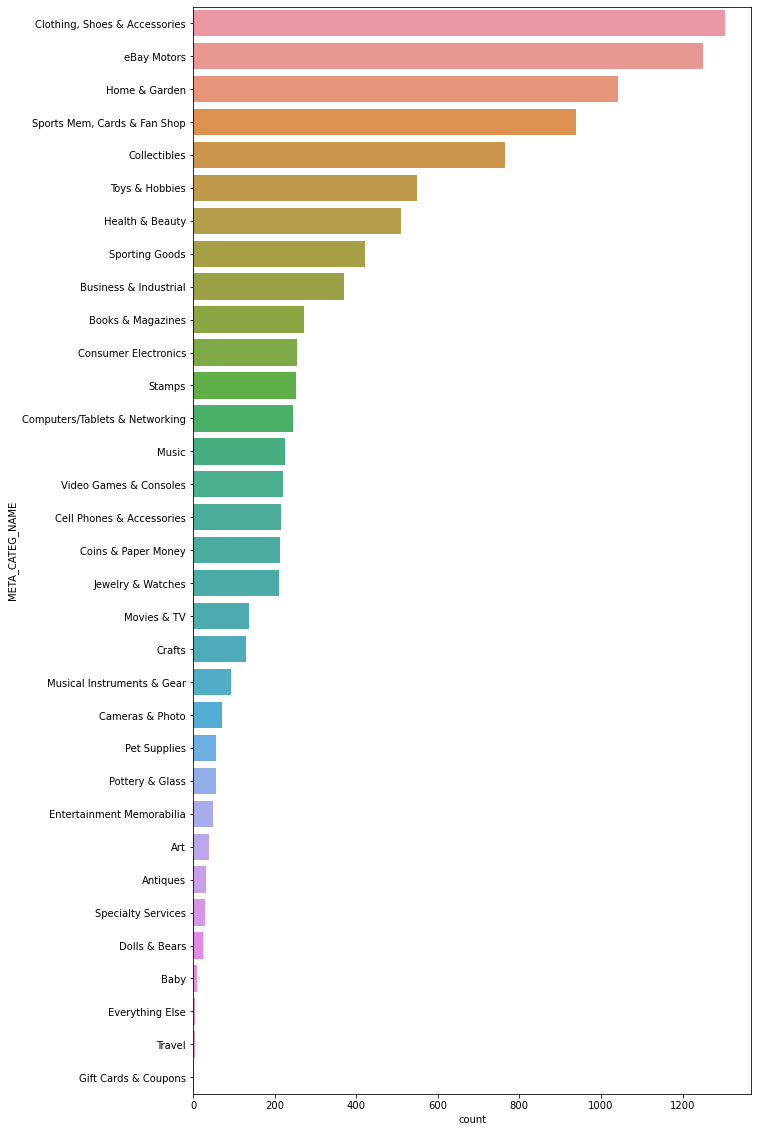

In [40]:
plt.figure(figsize=(10,20))
sns.countplot( y = 'META_CATEG_NAME' ,data = df, order = df['META_CATEG_NAME'].value_counts().index)

In [41]:
df['META_CATEG_NAME'].value_counts()

Clothing, Shoes & Accessories     1303
eBay Motors                       1250
Home & Garden                     1043
Sports Mem, Cards & Fan Shop       940
Collectibles                       765
Toys & Hobbies                     549
Health & Beauty                    510
Sporting Goods                     422
Business & Industrial              371
Books & Magazines                  272
Consumer Electronics               255
Stamps                             253
Computers/Tablets & Networking     246
Music                              225
Video Games & Consoles             221
Cell Phones & Accessories          215
Coins & Paper Money                212
Jewelry & Watches                  211
Movies & TV                        136
Crafts                             129
Musical Instruments & Gear          94
Cameras & Photo                     71
Pet Supplies                        57
Pottery & Glass                     57
Entertainment Memorabilia           50
Art                      

MOST-AUCTIONED-CATEGORY : Clothing, Shoes & Accessories 

In [42]:
df_temp = df[df['META_CATEG_NAME'] == "Clothing, Shoes & Accessories"]

Text(0.5, 1.0, 'Buyer Country Count')

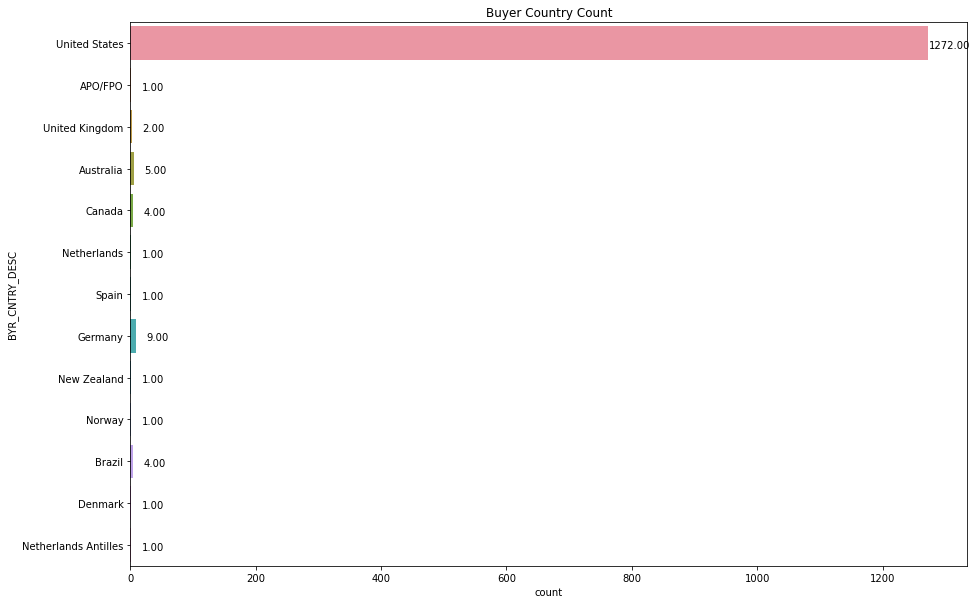

In [43]:
ax = sns.countplot( y = 'BYR_CNTRY_DESC' ,data = df_temp)
for p in ax.patches:
    width = p.get_width()
    plt.text(35+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.title("Buyer Country Count")

In [44]:
df_temp['BYR_CNTRY_DESC'].value_counts()

United States           1272
Germany                    9
Australia                  5
Canada                     4
Brazil                     4
United Kingdom             2
New Zealand                1
APO/FPO                    1
Netherlands                1
Spain                      1
Norway                     1
Netherlands Antilles       1
Denmark                    1
Name: BYR_CNTRY_DESC, dtype: int64

**United states is the country that buys the most goods of category Clothing, Shoes & Accessories**

In [45]:
df_temp = df[['USER_CRE_DATE' , 'BYR_CNTRY_DESC']]
df_temp.head()

,USER_CRE_DATE,BYR_CNTRY_DESC
0,05-06-1997 04:31,United States
1,05-06-1997 04:31,United States
2,05-06-1997 04:31,United States
3,05-06-1997 04:31,United States
4,05-06-1997 04:31,United States


In [46]:
df_temp['USER_CRE_DATE'] = df_temp['USER_CRE_DATE'].str[:10]
df_temp

,USER_CRE_DATE,BYR_CNTRY_DESC
0,05-06-1997,United States
1,05-06-1997,United States
2,05-06-1997,United States
3,05-06-1997,United States
4,05-06-1997,United States
...,...,...
9995,06-08-2007,United States
9996,06-08-2007,United States
9997,06-08-2007,United States
9998,06-08-2007,United States


In [47]:
df_temp['USER_CRE_DATE'] = pd.to_datetime(df_temp['USER_CRE_DATE'])
df_temp['year'] = df_temp['USER_CRE_DATE'].dt.year
df_temp

,USER_CRE_DATE,BYR_CNTRY_DESC,year
0,1997-05-06,United States,1997
1,1997-05-06,United States,1997
2,1997-05-06,United States,1997
3,1997-05-06,United States,1997
4,1997-05-06,United States,1997
...,...,...,...
9995,2007-06-08,United States,2007
9996,2007-06-08,United States,2007
9997,2007-06-08,United States,2007
9998,2007-06-08,United States,2007


<AxesSubplot:xlabel='count', ylabel='year'>

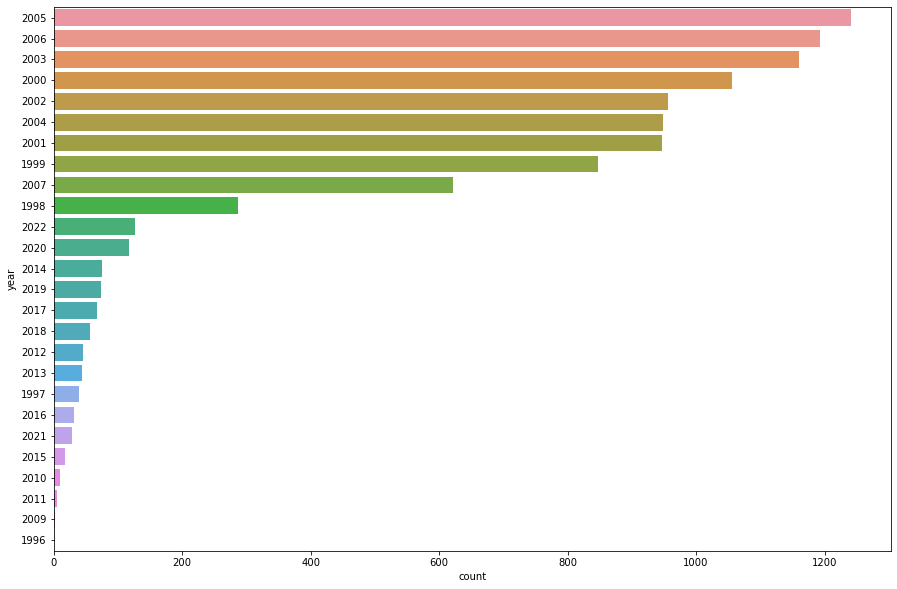

In [48]:
sns.countplot( y = 'year' ,data = df_temp, order = df_temp['year'].value_counts().index)


In [49]:
df_temp['year'].value_counts()

2005    1241
2006    1193
2003    1160
2000    1056
2002     957
2004     948
2001     947
1999     848
2007     622
1998     287
2022     127
2020     117
2014      75
2019      73
2017      68
2018      57
2012      45
2013      44
1997      39
2016      32
2021      28
2015      18
2010      10
2011       5
2009       2
1996       1
Name: year, dtype: int64

IN **2005** most user were created

In [50]:
df_temp["USER_CRE_DATE"].min()

Timestamp('1996-08-31 00:00:00')

In [51]:
oldest_user_country = df_temp['BYR_CNTRY_DESC'].loc[df_temp["USER_CRE_DATE"] == df["AUCT_END_DT"].min()]
oldest_user_country

1111    United States
3146    United States
6067    United States
9687    United States
9688    United States
Name: BYR_CNTRY_DESC, dtype: object

**Oldest user belongs to United States**

In [52]:
df_temp = df[['AUCT_END_DT']]
df_temp.head().T

,0,1,2,3,4
AUCT_END_DT,14-07-2022,06-07-2022,23-07-2022,28-07-2022,28-07-2022


In [53]:
df_temp['AUCT_END_DT'] = pd.to_datetime(df_temp['AUCT_END_DT'])
df_temp['week'] = df_temp['AUCT_END_DT'].dt.week
df_temp

,AUCT_END_DT,week
0,2022-07-14,28
1,2022-06-07,23
2,2022-07-23,29
3,2022-07-28,30
4,2022-07-28,30
...,...,...
9995,2022-02-05,5
9996,2022-05-22,20
9997,2022-01-05,1
9998,2022-05-30,22


In [54]:
df_temp['week'].value_counts()

20    1177
29    1093
21    1079
28     842
30     592
22     549
19     456
1      383
27     372
31     366
26     337
14     316
40     311
18     299
49     297
36     291
9      187
45     181
6      170
44     149
23     148
5      142
10     130
24      81
25      52
Name: week, dtype: int64

<AxesSubplot:xlabel='count', ylabel='week'>

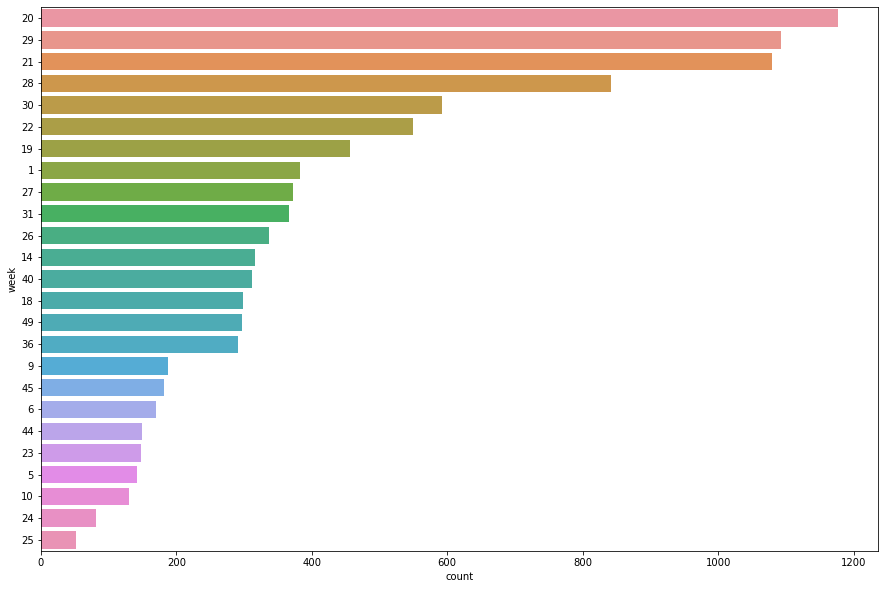

In [55]:
sns.countplot( y = 'week' ,data = df_temp, order = df_temp['week'].value_counts().index)

Most auctions ended in **Week 20**

In [56]:
df.columns

Index(['RETAIL_YEAR', 'RETAIL_WEEK', 'CAL_WK', 'BYR_CNTRY_DESC', 'AUCT_END_DT',
       'SLR_CNTRY_ID', 'CREATED_DT', 'BSNS_VRTCL_NAME', 'META_CATEG_NAME',
       'USER_CRE_DATE', 'CATEG_LVL2_NAME', 'CATEG_LVL3_NAME',
       'CATEG_LVL4_NAME', 'CHECKOUT_STATUS', 'START_PRICE_USD',
       'CURNT_PRICE_USD', 'QUANTITY', 'GMB', 'FM_seg'],
      dtype='object')

**FINDING THE PRODUCT WITH LOWEST AUCTION TIME**

In [57]:
df_temp = df

In [58]:
def min_auct(df) : 
    df_temp = df
    df_temp['AUCT_END_DT'] = pd.to_datetime(df_temp['AUCT_END_DT'])
    df_temp['CREATED_DT'] = pd.to_datetime(df_temp['CREATED_DT'])
    df_temp['auction_time'] = df_temp['AUCT_END_DT'] - df_temp['CREATED_DT']
    df_temp = df_temp[df_temp['auction_time'] == df_temp['auction_time'].min()]
    return df_temp

In [59]:
auct_min = min_auct(df_temp)
auct_min

,RETAIL_YEAR,RETAIL_WEEK,CAL_WK,BYR_CNTRY_DESC,AUCT_END_DT,SLR_CNTRY_ID,CREATED_DT,BSNS_VRTCL_NAME,META_CATEG_NAME,USER_CRE_DATE,CATEG_LVL2_NAME,CATEG_LVL3_NAME,CATEG_LVL4_NAME,CHECKOUT_STATUS,START_PRICE_USD,CURNT_PRICE_USD,QUANTITY,GMB,FM_seg,auction_time
4580,2022,19,19,United States,2022-01-06,1.0,2022-12-05,Lifestyle,Sporting Goods,14-03-2003 17:16,Outdoor Sports,Air Guns & Slingshots,BBs & Pellets,2.0,8.85,8.85,1.0,8.85,Frequent High Spenders,-333 days


In [60]:
auct_min['META_CATEG_NAME'].value_counts()

Sporting Goods    1
Name: META_CATEG_NAME, dtype: int64

IT CAN BE NOTICED IN SOME ROWS **ACTION END DATE < AUCTION CREATED DATE**, REMOVE SUCH ROWS

In [61]:
df.shape

(10000, 20)

In [62]:
cat_high_GMB =df[df['GMB'] == df['GMB'].max()]
cat_high_GMB = cat_high_GMB['META_CATEG_NAME']
cat_high_GMB.value_counts()

eBay Motors                       248
Home & Garden                     143
Clothing, Shoes & Accessories     102
Business & Industrial              80
Computers/Tablets & Networking     76
Consumer Electronics               72
Sporting Goods                     63
Collectibles                       55
Video Games & Consoles             47
Sports Mem, Cards & Fan Shop       47
Coins & Paper Money                42
Jewelry & Watches                  41
Cell Phones & Accessories          39
Health & Beauty                    32
Toys & Hobbies                     31
Musical Instruments & Gear         20
Cameras & Photo                    15
Music                              14
Antiques                           13
Pottery & Glass                     9
Art                                 9
Crafts                              5
Books & Magazines                   4
Entertainment Memorabilia           4
Pet Supplies                        4
Specialty Services                  2
Baby        

Text(0.5, 1.0, 'GMB vs Category')

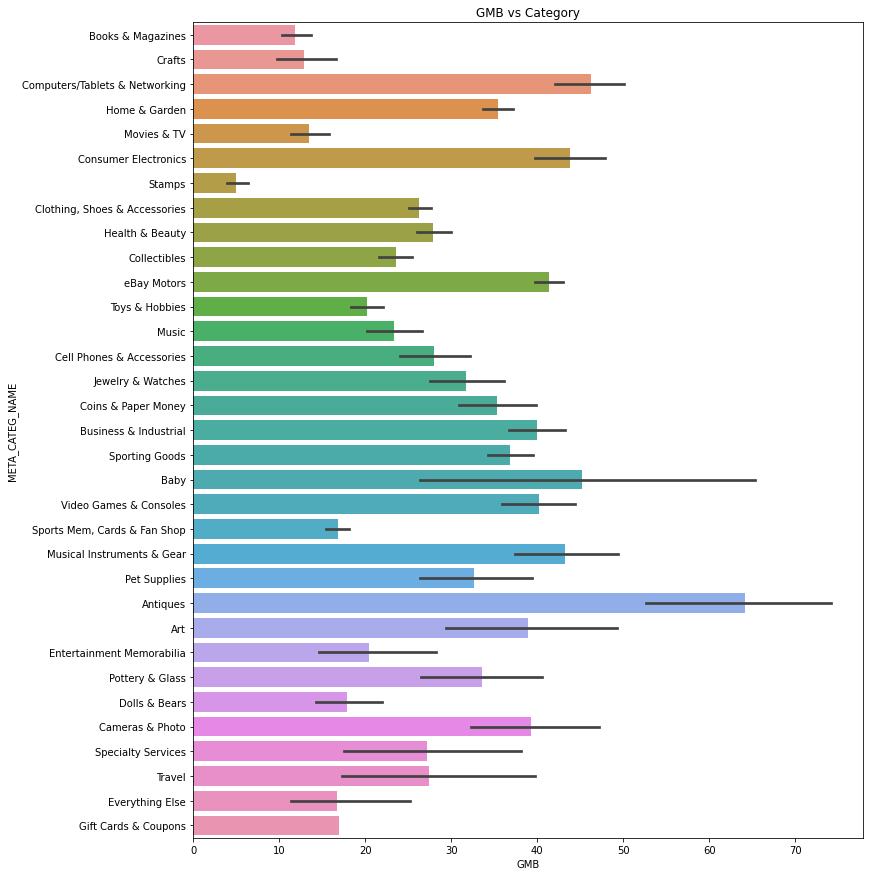

In [64]:
plt.figure(figsize=(12, 15))
sns.barplot(y=df['META_CATEG_NAME'], x=df['GMB'])
plt.title("GMB vs Category")

**Antiques** has  highest GMB(gross merchandise bought).

## 5. Data Preparation

### 5.1 Label Encoding

In [65]:
def label_encoding(col):
    label_encoder = LabelEncoder()
    df[col]= label_encoder.fit_transform(df[col])
    df[col].unique()

In [66]:
for i in cat_col:
    label_encoding(i)

In [67]:
df.head()

,RETAIL_YEAR,RETAIL_WEEK,CAL_WK,BYR_CNTRY_DESC,AUCT_END_DT,SLR_CNTRY_ID,CREATED_DT,BSNS_VRTCL_NAME,META_CATEG_NAME,USER_CRE_DATE,CATEG_LVL2_NAME,CATEG_LVL3_NAME,CATEG_LVL4_NAME,CHECKOUT_STATUS,START_PRICE_USD,CURNT_PRICE_USD,QUANTITY,GMB,FM_seg,auction_time
0,2022,18,18,35,59,1.0,4,6,3,314,34,125,180,2.0,3.87,3.87,1.0,3.87,2,70 days
1,2022,18,18,35,36,1.0,4,6,3,314,34,125,180,2.0,3.98,3.98,1.0,3.98,2,33 days
2,2022,18,18,35,68,1.0,4,6,3,314,34,125,180,2.0,4.08,4.08,1.0,3.22,2,79 days
3,2022,18,18,35,73,1.0,4,6,3,314,34,125,180,2.0,3.57,3.57,1.0,2.82,2,84 days
4,2022,18,18,35,73,1.0,4,6,3,314,34,125,180,2.0,4.08,4.08,1.0,3.22,2,84 days
